<a href="https://colab.research.google.com/github/leoforner/Calc_diluicao_automatico/blob/main/IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Galeria

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data



matplotlib.rcParams['font.size'] = 18

images = ('astronaut',
          'binary_blobs',
          'brick',
          'colorwheel',
          'camera',
          'cat',
          'checkerboard',
          'clock',
          'coffee',
          'coins',
          'grass',
          'gravel',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

#plt.show()

In [ ]:
# @title Codigo base



# prompt: use a biblioteca scikit para plotar uma a imagem "teste.tif" no caminho  "Colab Notebooks/IC/imagens" no meu drive
#Talvez seja util https://scikit-image.org/docs/stable/auto_examples/applications/plot_solidification_tracking.html


#conexão com drive
from google.colab import drive
drive.mount('/content/drive')


import matplotlib.pyplot as plt
import skimage as ski


# Read the image from the specified path
image_path = '/content/drive/My Drive/Colab Notebooks/IC/imagens/teste3.tif'
image = ski.io.imread(image_path)


if image.ndim > 2:
    image = image.mean(axis=2)

'''


# Plot the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()
'''

'''
if image.ndim > 2:
    image = image.mean(axis=2)


edges = ski.filters.sobel(image)
ski.io.imshow(edges)
ski.io.show()

'''



Mounted at /content/drive


'\nif image.ndim > 2:\n    image = image.mean(axis=2)\n\n\nedges = ski.filters.sobel(image)\nski.io.imshow(edges)\nski.io.show()\n\n'

In [ ]:
# @title desenho de contornos
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html#sphx-glr-auto-examples-edges-plot-contours-py


import numpy as np

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi : np.pi : 100j, -np.pi : np.pi : 100j]
r = np.sin(np.exp(np.sin(x) ** 3 + np.cos(y) ** 2))


if image.ndim > 2:
    image = image.mean(axis=2)

# Find contours at a constant value of 0.8
contours = measure.find_contours(image, 1)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

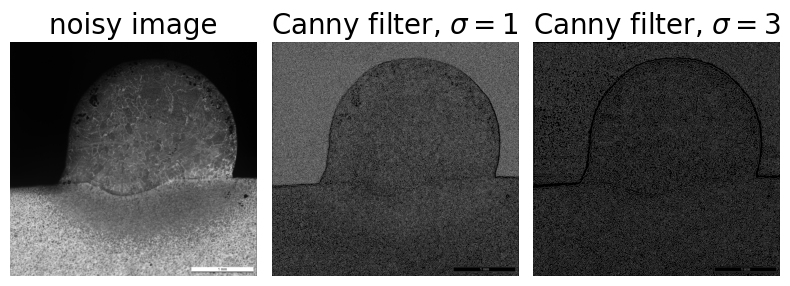

In [ ]:
# @title desenho de vale
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html#sphx-glr-auto-examples-edges-plot-canny-py
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


# Generate noisy image of a square
image1 = np.zeros((128, 128), dtype=float)
image1[32:-32, 32:-32] = 1

image1 = ndi.rotate(image1, 15, mode='constant')
image1 = ndi.gaussian_filter(image1, 4)
image1 = random_noise(image1, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


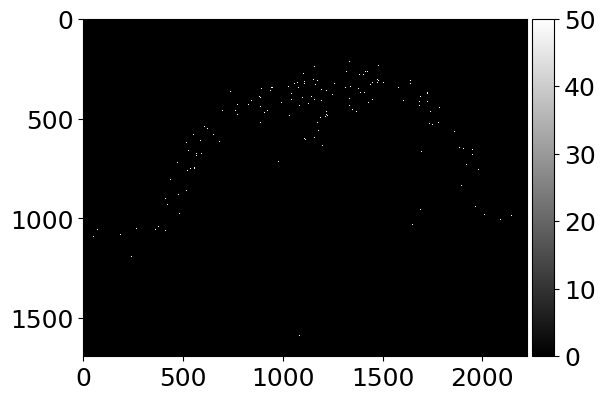

In [ ]:

#image = edges1

imagem_reserva = image

new_image1 = image
new_image2 = image
mask = new_image2 < 10
mask2 = new_image2 > 50

new_image1[mask] = 0
new_image1[mask2] = 0

ski.io.imshow(new_image1, cmap='gray')

In [ ]:
image = edges2

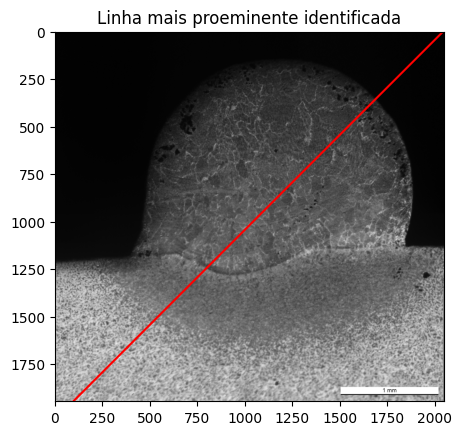

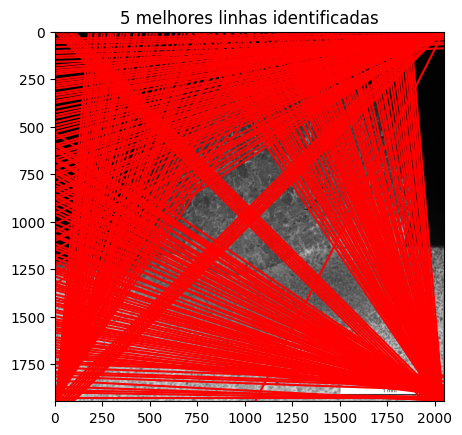

In [ ]:
# @title detecção de linhas


# 1 linha
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage import data

# Carregando uma imagem de exemplo (você pode substituir por sua própria imagem)
#image = data.camera()

# Aplicando a transformada de Hough para encontrar as linhas na imagem
h, theta, d = hough_line(image)

# Encontrando os picos na transformada de Hough
peaks = hough_line_peaks(h, theta, d)

# Selecionando o pico mais proeminente
best_peak_idx = np.argmax(peaks[0])
best_angle = peaks[1][best_peak_idx]
best_distance = peaks[2][best_peak_idx]

# Calculando as coordenadas das extremidades da linha
y0 = (best_distance - 0 * np.cos(best_angle)) / np.sin(best_angle)
y1 = (best_distance - image.shape[1] * np.cos(best_angle)) / np.sin(best_angle)

# Plotando a imagem original com a linha identificada
plt.imshow(image, cmap=plt.cm.gray)
plt.plot((0, image.shape[1]), (y0, y1), '-r')
plt.xlim((0, image.shape[1]))
plt.ylim((image.shape[0], 0))
plt.title('Linha mais proeminente identificada')
plt.show()


'''
# 5 linhas

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage import data
'''

# Carregando uma imagem de exemplo (você pode substituir por sua própria imagem)
#image = data.camera()

# Aplicando a transformada de Hough para encontrar as linhas na imagem
h, theta, d = hough_line(image)

# Encontrando os picos na transformada de Hough
peaks = hough_line_peaks(h, theta, d, num_peaks=500)

# Plotando a imagem original com as 5 linhas identificadas
plt.imshow(image, cmap=plt.cm.gray)
for _, angle, dist in zip(*peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, image.shape[1]), (y0, y1), '-r')
plt.xlim((0, image.shape[1]))
plt.ylim((image.shape[0], 0))
plt.title('5 melhores linhas identificadas')
plt.show()





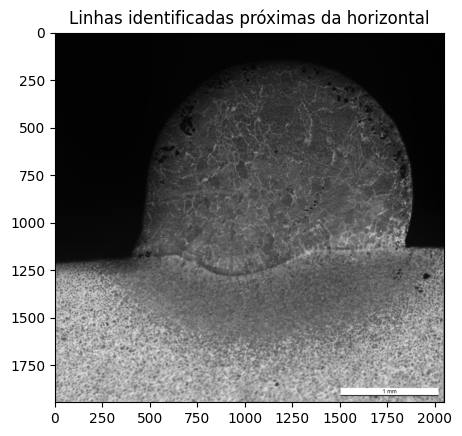

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage import data

# Carregando uma imagem de exemplo (você pode substituir por sua própria imagem)
#image = data.camera()

# Aplicando a transformada de Hough para encontrar as linhas na imagem
h, theta, d = hough_line(image)

# Definindo o intervalo de ângulos próximos da horizontal
theta_threshold = np.deg2rad(10)  # Definindo um limiar de 10 graus

# Encontrando os picos na transformada de Hough com base no intervalo de ângulos
peaks = hough_line_peaks(h, theta, d, num_peaks=5)
filtered_peaks = [[], [], []]  # Listas para armazenar picos filtrados

# Filtrando picos com base no intervalo de ângulos
for peak, angle, dist in zip(*peaks):
    if np.abs(angle - np.pi/2) < theta_threshold or np.abs(angle - np.pi) < theta_threshold:
        filtered_peaks[0].append(peak)
        filtered_peaks[1].append(angle)
        filtered_peaks[2].append(dist)

# Plotando a imagem original com as linhas identificadas
plt.imshow(image, cmap=plt.cm.gray)
for peak, angle, dist in zip(*filtered_peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, image.shape[1]), (y0, y1), '-r')
plt.xlim((0, image.shape[1]))
plt.ylim((image.shape[0], 0))
plt.title('Linhas identificadas próximas da horizontal')
plt.show()


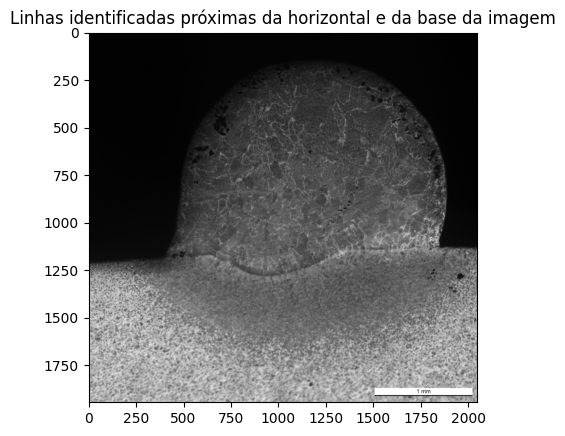

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage import data

# Carregando uma imagem de exemplo (você pode substituir por sua própria imagem)
#image = data.camera()

# Aplicando a transformada de Hough para encontrar as linhas na imagem
h, theta, d = hough_line(image)

# Definindo o limiar de proximidade da base da imagem (por exemplo, 80% da altura da imagem)
height_threshold =  0.4 * image.shape[0]

# Encontrando os picos na transformada de Hough e filtrando com base na proximidade da base da imagem
peaks = hough_line_peaks(h, theta, d, num_peaks=5)
filtered_peaks = [[], [], []]  # Listas para armazenar picos filtrados

# Filtrando picos com base na proximidade da base da imagem
for peak, angle, dist in zip(*peaks):
    if np.abs(angle - np.pi/2) < np.deg2rad(10) or np.abs(angle - np.pi) < np.deg2rad(10):
        if dist > height_threshold:
            filtered_peaks[0].append(peak)
            filtered_peaks[1].append(angle)
            filtered_peaks[2].append(dist)

# Plotando a imagem original com as linhas identificadas
plt.imshow(image, cmap=plt.cm.gray)
for peak, angle, dist in zip(*filtered_peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, image.shape[1]), (y0, y1), '-r')
plt.xlim((0, image.shape[1]))
plt.ylim((image.shape[0], 0))
plt.title('Linhas identificadas próximas da horizontal e da base da imagem')
plt.show()


In [ ]:
# @title poligonos
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html#sphx-glr-auto-examples-edges-plot-polygon-py

import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon


hand = image

# subdivide polygon using 2nd degree B-Splines
new_hand = hand.copy()
for _ in range(5):
    new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)

# approximate subdivided polygon with Douglas-Peucker algorithm
appr_hand = approximate_polygon(new_hand, tolerance=0.02)

print("Number of coordinates:", len(hand), len(new_hand), len(appr_hand))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax1.plot(hand[:, 0], hand[:, 1])
ax1.plot(new_hand[:, 0], new_hand[:, 1])
ax1.plot(appr_hand[:, 0], appr_hand[:, 1])



ValueError: could not broadcast input array from shape (1945,2047) into shape (1945,2)

In [ ]:
# @title transformada de linha de hough
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html#sphx-glr-auto-examples-edges-plot-line-hough-transform-py

import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm



# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [
    np.rad2deg(theta[0] - angle_step),
    np.rad2deg(theta[-1] + angle_step),
    d[-1] + d_step,
    d[0] - d_step,
]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

plt.tight_layout()
plt.show()

In [ ]:
# @title tratamento de imagem
#https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html#sphx-glr-auto-examples-color-exposure-plot-ihc-color-separation-py

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = image

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

In [ ]:
# @title Codigo de medição de area
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html


import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

img = data.coins()
# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 50)
mask = morphology.remove_small_holes(mask, 50)
labels = measure.label(mask)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)


